In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [114]:
# Set common graphic features
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 14})

In [111]:
top_df = pd.read_csv('results/top20_num/csv/RF28_feature_analysis.csv')
top_fi = pd.read_csv('results/top20_num/csv/RF24.csv')

In [62]:
change_df = pd.read_csv('results/e_num_inc_20pct/csv/RF28_feature_analysis.csv')
change_fi = pd.read_csv('results/e_num_inc_20pct/csv/RF24.csv')

In [67]:
change_df.groupby('label_value').mean()

,Unnamed: 0,population,poverty_rate,pct_renter_occupied,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,...,eviction_rate_pct_change_3yr_lag_tr,eviction_filing_rate_pct_change_3yr_lag_tr,conversion_rate_pct_change_3yr_lag_tr,eviction_filings_pct_change_5yr_lag_tr,evictions_pct_change_5yr_lag_tr,eviction_rate_pct_change_5yr_lag_tr,eviction_filing_rate_pct_change_5yr_lag_tr,conversion_rate_pct_change_5yr_lag_tr,score,pred
label_value,,,,,,,,,,,,,,,,,,,,,
0,360061.273614,1423.302416,13.158606,32.384760,67.617026,16.979627,9.755576,0.344315,2.561885,0.034268,...,124.242068,124.242068,164.644305,392.754430,114.281058,92.638593,92.638593,113.895567,0.321300,0.116633
1,362917.270551,1493.953280,13.863921,34.617379,66.465813,18.391239,10.118965,0.331402,2.492866,0.035659,...,88.979408,88.979408,130.115347,198.784526,75.680089,57.577787,57.577787,82.959741,0.463711,0.360532


In [47]:
imp_feat_top = list(top_fi['feature'][0:21])

In [48]:
imp_feat_top

['evictions_avg_5yr_lag',
 'evictions_lag',
 'evictions_avg_3yr_lag',
 'eviction_filings_avg_5yr_lag',
 'eviction_filings_lag',
 'eviction_filings_avg_3yr_lag',
 'renter_occupied_households',
 'evictions_lag_tr',
 'eviction_filing_rate_avg_3yr_lag',
 'renter_occupied_households_avg_5yr',
 'eviction_filings_lag_tr',
 'eviction_filing_rate_lag',
 'eviction_filings_avg_5yr_lag_tr',
 'eviction_rate_lag',
 'eviction_rate_avg_5yr_lag',
 'evictions_avg_3yr_lag_tr',
 'evictions_avg_5yr_lag_tr',
 'eviction_filings_avg_3yr_lag_tr',
 'eviction_filing_rate_avg_5yr_lag',
 'eviction_rate_lag_tr',
 'eviction_rate_avg_3yr_lag']

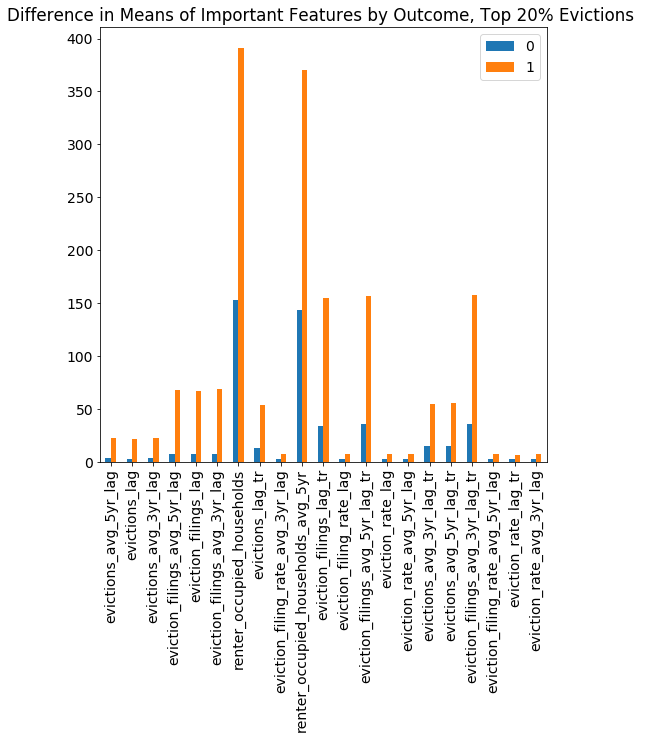

In [118]:
# Difference of means for top 20 outcome
cols_dm = imp_feat_top + ['label_value']

df = top_df[cols_dm]
df_gp = df.groupby(['label_value']).mean()
X = list(df_gp.columns)

Y = df_gp.iloc[0]
Z = df_gp.iloc[1]

dfp = pd.DataFrame(np.c_[Y,Z], index=X)
dfp.plot.bar()
plt.title("Difference in Means of Important Features by Outcome, Top 20% Evictions ")

plt.show()

In [112]:
bias_cols = ["pct_renter_occupied", "pct_white", "pct_af_am", "pct_hispanic", "pct_am_ind", "pct_asian", "pct_nh_pi",
  "pct_multiple", "pct_other","renter_occupied_households", "median_household_income", "median_property_value",'pred']

In [113]:
top_bias = top_df[bias_cols]

In [99]:
top_bias.head()

,pct_renter_occupied,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,pred
0,52.56,33.95,52.26,6.63,2.12,1.91,0.00,3.14,0.0,1
1,53.06,15.12,50.97,21.42,4.96,1.61,1.15,4.78,0.0,1
2,58.02,15.75,63.75,8.38,0.00,5.67,0.00,6.46,0.0,1
3,69.09,9.28,87.70,3.02,0.00,0.00,0.00,0.00,0.0,1
4,62.56,32.82,40.80,25.14,0.00,0.00,0.00,1.25,0.0,1


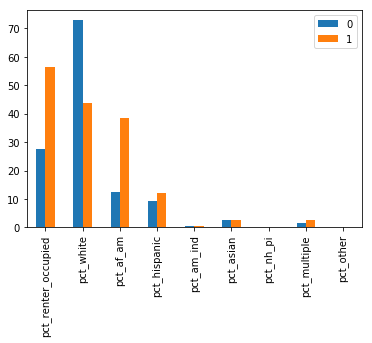

In [100]:
# Difference of means for top 20 outcome for bias columns
df_bias_gp = top_bias.groupby(['pred']).mean()
X = list(df_bias_gp.columns)

Y = df_bias_gp.iloc[0]
Z = df_bias_gp.iloc[1]

dfp = pd.DataFrame(np.c_[Y,Z], index=X)
dfp.plot.bar()

plt.show()

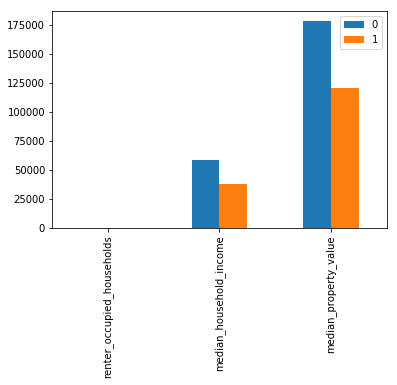

In [103]:
top_bias_count = top_df[["renter_occupied_households", "median_household_income", "median_property_value", "pred"]]
df_bias_count_gp = top_bias_count.groupby(['pred']).mean()
X = list(df_bias_count_gp.columns)

Y = df_bias_count_gp.iloc[0]
Z = df_bias_count_gp.iloc[1]

dfp = pd.DataFrame(np.c_[Y,Z], index=X)
dfp.plot.bar()

plt.show()

In [107]:
df_bias_gp = top_bias.groupby('pred').mean()

In [109]:
df_bias_gp.to_csv("group_compare.csv")

In [ ]:
# Difference of means for top 20 outcome for bias columns
cols_dm = imp_feat_top + ['label_value']

df = top_df[cols_dm]
df_gp = df.groupby(['label_value']).mean()
X = list(df_gp.columns)

Y = df_gp.iloc[0]
Z = df_gp.iloc[1]

dfp = pd.DataFrame(np.c_[Y,Z], index=X)
dfp.plot.bar()

plt.show()

In [56]:
cols_fc = imp_feat_top + ['score']

df_fc = top_df[cols_fc]

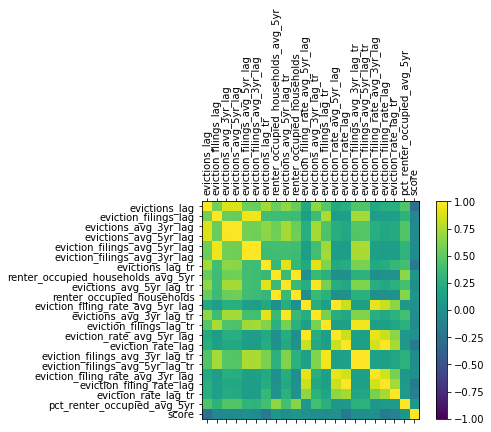

In [76]:
# feature correlation matrix

corr_table = df_fc.corr(method = 'pearson')
names = list(corr_table.index)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr_table, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(names),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names,  rotation = 90)
ax.set_yticklabels(names)

plt.show()

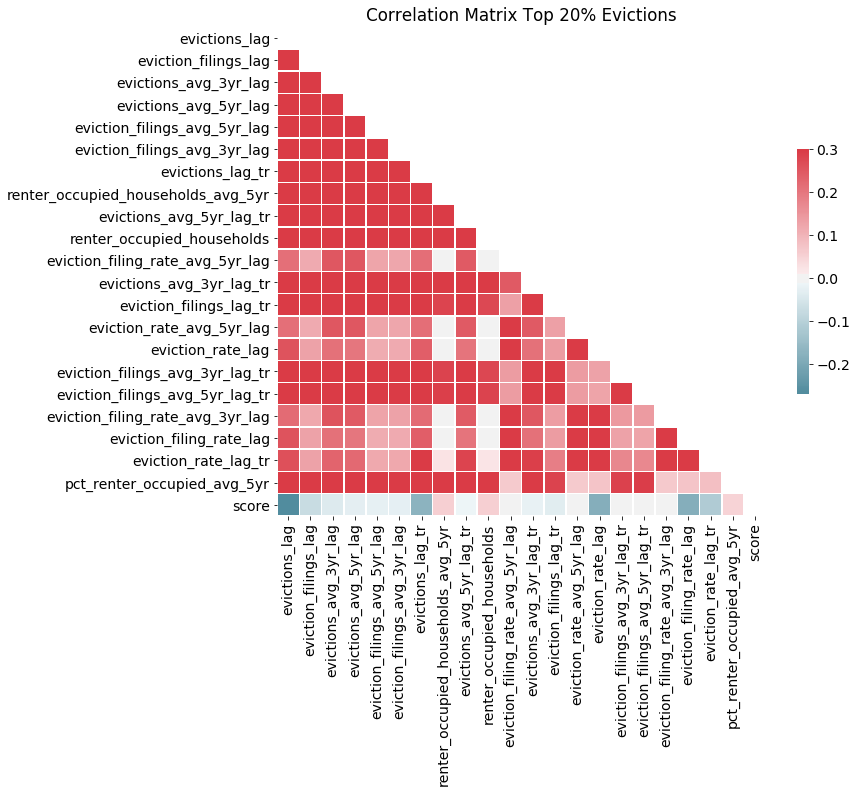

In [116]:
# Colored correlation matrix for display
mask = np.zeros_like(corr_table, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_table, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix Top 20% Evictions")

plt.show()

In [58]:
imp_feat_chg = list(change_fi['feature'][0:21])

In [59]:
imp_feat_chg

['eviction_filing_rate_pct_change_1yr_lag',
 'evictions_pct_change_1yr_lag',
 'eviction_rate_pct_change_1yr_lag',
 'evictions_pct_change_3yr_lag',
 'eviction_filing_rate_pct_change_3yr_lag',
 'eviction_rate_pct_change_3yr_lag',
 'eviction_filing_rate_lag',
 'conversion_rate_lag',
 'eviction_rate_lag',
 'eviction_rate_pct_change_5yr_lag',
 'eviction_filing_rate_pct_change_5yr_lag',
 'evictions_pct_change_5yr_lag',
 'conversion_rate_pct_change_1yr_lag',
 'eviction_filings_avg_5yr_lag',
 'conversion_rate_pct_change_3yr_lag',
 'eviction_filings_avg_3yr_lag',
 'evictions_avg_5yr_lag',
 'conversion_rate_pct_change_5yr_lag',
 'eviction_filings_pct_change_1yr_lag',
 'evictions_lag',
 'evictions_avg_3yr_lag']

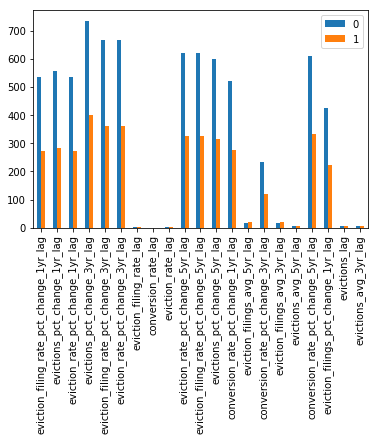

In [68]:
#Difference of means for 20% change outcome
cols_dm = imp_feat_chg + ['label_value']

df = change_df[cols_dm]
df_gp = df.groupby(['label_value']).mean()
X = list(df_gp.columns)

Y = df_gp.iloc[0]
Z = df_gp.iloc[1]

dfp = pd.DataFrame(np.c_[Y,Z], index=X)
dfp.plot.bar()

plt.show()

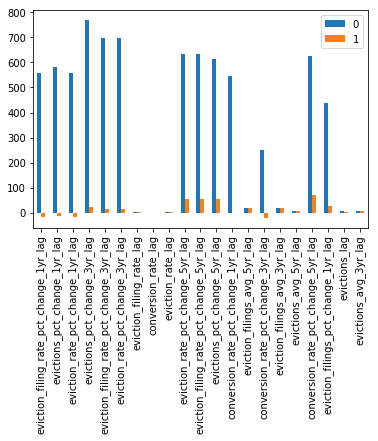

In [70]:
#Difference of means for 20% change outcome
cols_dm = imp_feat_chg + ['pred']

df = change_df[cols_dm]
df_gp_pred = df.groupby(['pred']).mean()
X = list(df_gp_pred.columns)

Y = df_gp_pred.iloc[0]
Z = df_gp_pred.iloc[1]

dfp = pd.DataFrame(np.c_[Y,Z], index=X)
dfp.plot.bar()

plt.show()

In [71]:
df_gp_pred.head()

,eviction_filing_rate_pct_change_1yr_lag,evictions_pct_change_1yr_lag,eviction_rate_pct_change_1yr_lag,evictions_pct_change_3yr_lag,eviction_filing_rate_pct_change_3yr_lag,eviction_rate_pct_change_3yr_lag,eviction_filing_rate_lag,conversion_rate_lag,eviction_rate_lag,eviction_rate_pct_change_5yr_lag,...,evictions_pct_change_5yr_lag,conversion_rate_pct_change_1yr_lag,eviction_filings_avg_5yr_lag,conversion_rate_pct_change_3yr_lag,eviction_filings_avg_3yr_lag,evictions_avg_5yr_lag,conversion_rate_pct_change_5yr_lag,eviction_filings_pct_change_1yr_lag,evictions_lag,evictions_avg_3yr_lag
pred,,,,,,,,,,,,,,,,,,,,,
0,559.850653,581.589195,559.850653,768.628471,698.132829,698.132829,3.943678,0.499183,3.943678,635.705243,...,613.269443,545.284342,20.237601,248.810267,20.306219,7.474456,624.491286,438.522051,7.919788,7.343379
1,-15.811711,-13.448408,-15.811711,23.221234,13.989705,13.989705,1.166785,0.247589,1.166785,56.634784,...,53.252642,-0.850422,17.016372,-20.908681,16.943965,7.163947,72.563885,27.758257,2.434085,6.930026


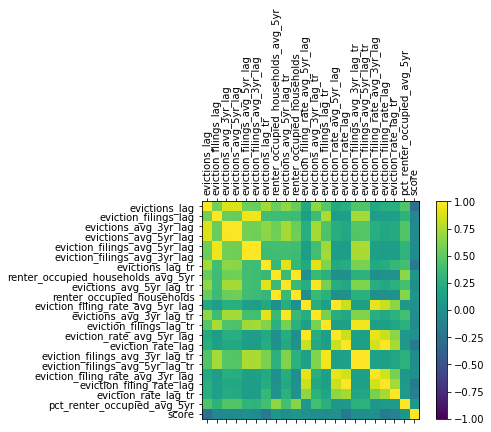

In [61]:
cols_fc = imp_feat_change + ['score']

df_fc = change_df[cols_fc]

# feature correlation matrix

corr_table = df_fc.corr(method = 'pearson')
names = list(corr_table.index)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr_table, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(names),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names,  rotation = 90)
ax.set_yticklabels(names)

plt.show()



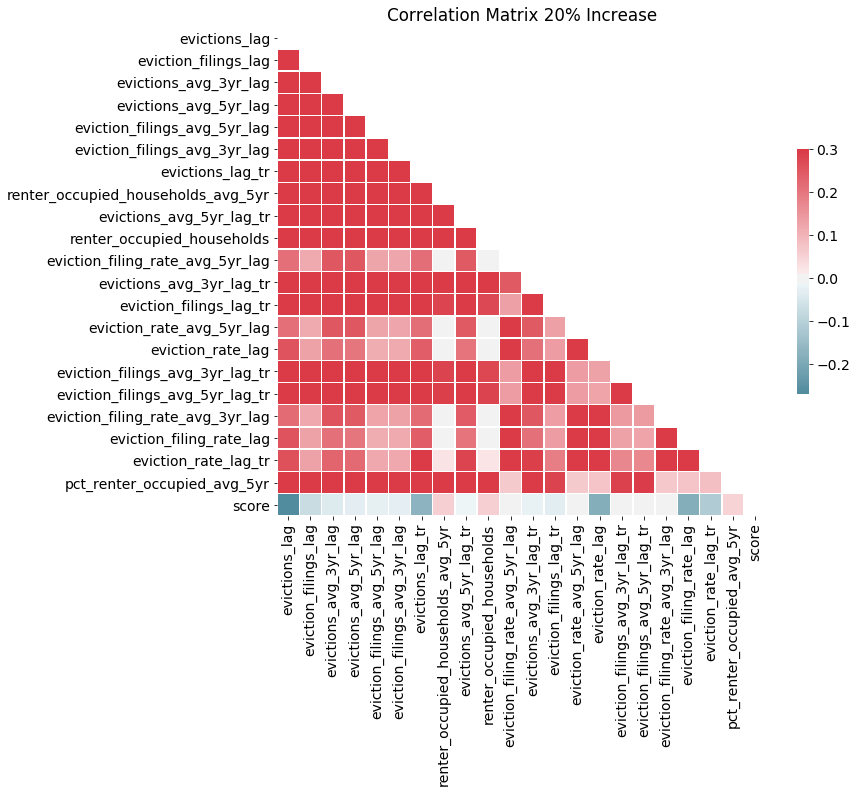

In [117]:
# Colored correlation matrix for display
mask = np.zeros_like(corr_table, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_table, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix 20% Increase")

plt.show()